SARIMAX

https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6

https://towardsdatascience.com/the-best-deep-learning-models-for-time-series-forecasting-690767bc63f0

https://towardsdatascience.com/multi-seasonal-time-series-decomposition-using-mstl-in-python-136630e67530

https://www.kaggle.com/code/shujun717/1-solution-lstm-cnn-transformer-1-fold/notebook

In [12]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
#%matplotlib inline

from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
#!pip install pmdarima --quiet

import pmdarima as pm

Getting the Indexes

In [13]:
#df = pd.read_csv("/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/results/BZ=F.csv")

#df = pd.read_csv("/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/results/SOL.JO.csv")

df = pd.read_csv("/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/results/^GSPC.csv")

#df = pd.read_csv("/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/results/jsebased.csv")



#string to date format
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df = df.set_index(['Date'])
df.drop(['Dividends','Stock Splits'], axis=1,inplace=True)
#df.drop(['moex_Close', 'cluster_labels', 'anomaly_score','ks11_Close'], axis=1, inplace=True)
df.dropna(0,inplace=True)

df.head(10)

/var/folders/kn/6d98ln2n1tj8j95tnddt4wkc0000gn/T/ipykernel_49277/3958802193.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0,inplace=True)


,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000
1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000
1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000
1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000


Getting Energy trades

In [14]:
df_oil = pd.read_csv("/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/results/BZ=F.csv")



#string to date format
df_oil['Date'] = pd.to_datetime(df_oil['Date'],infer_datetime_format=True)
df_oil = df_oil.set_index(['Date'])
#df_oil.head(10)

df_oil.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
#df.head(10)
#df.shape

df_oil.dropna(0,inplace=True)
#df.shape

df_oil.head(10)

/var/folders/kn/6d98ln2n1tj8j95tnddt4wkc0000gn/T/ipykernel_49277/2086470375.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_oil.dropna(0,inplace=True)


,Open,High,Low,Close,Volume
Date,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,2575
2007-07-31,75.699997,77.169998,75.669998,77.050003,3513
2007-08-01,77.000000,77.059998,74.860001,75.349998,3930
2007-08-02,75.220001,76.209999,74.269997,75.760002,6180
2007-08-03,75.389999,76.000000,74.529999,74.750000,4387
2007-08-06,74.540001,74.599998,70.870003,71.169998,7201
2007-08-07,70.800003,72.010002,70.559998,71.800003,6775
2007-08-08,71.440002,72.029999,70.660004,70.989998,5768
2007-08-09,70.910004,71.080002,69.269997,70.209999,6232


## Plotting


### Rolling Mean and STDev
#### S&P 500

In [15]:

#Determine rolling statistics
df["rolling_avg"] = df["Close"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df["rolling_std"] = df["Close"].rolling(window=12).std()

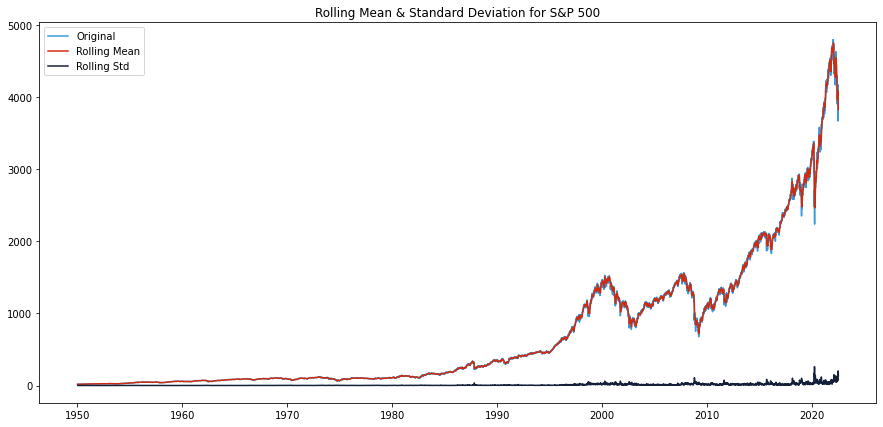

In [16]:
#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df["Close"], color='#379BDB', label='Original')
plt.plot(df["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for S&P 500')
plt.show(block=False)

#### Oil

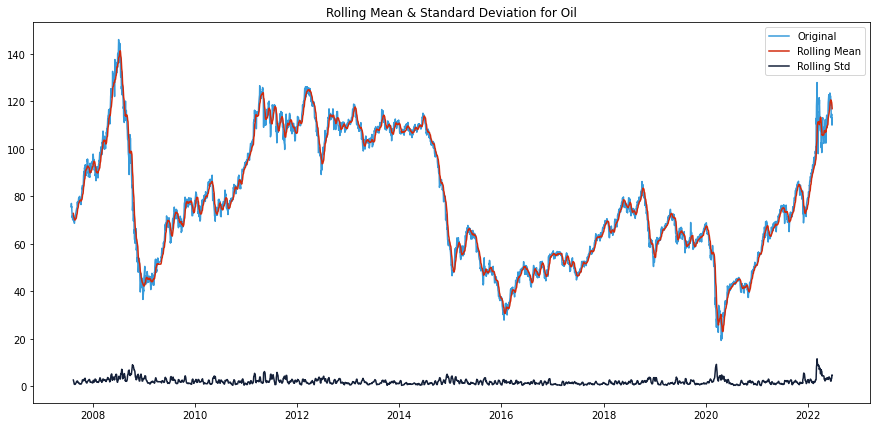

In [17]:
#Determine rolling statistics
df_oil["rolling_avg"] = df_oil["Close"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df_oil["rolling_std"] = df_oil["Close"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df_oil["Close"], color='#379BDB', label='Original')
plt.plot(df_oil["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df_oil["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Oil')
plt.show(block=False)

For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:
p-value <= significance level (0.01, 0.05, 0.10, etc.)
If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.



The KDE curve should be very similar to the normal distribution (labeled as N(0,1) in the plot)


Correlogram (ACF plot)
95% of correlations for lag greater than zero should not be significant. The grey area is the confidence band, and if values fall outside of this then they are statistically significant. In our case, there are a few values outside of this area, and therefore we may need to add more predictors to make the model more accurate

### ADF
#### S&P 500

In [18]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                     2.716697
p-value                            0.999088
#Lags Used                        44.000000
Number of Observations Used    18193.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861699
Critical Value (10%)              -2.566855
dtype: float64


#### Oil

In [19]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_oil['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -1.908994
p-value                           0.327842
#Lags Used                       15.000000
Number of Observations Used    3680.000000
Critical Value (1%)              -3.432128
Critical Value (5%)              -2.862326
Critical Value (10%)             -2.567188
dtype: float64


### BASIC

In [20]:
#Forecasting ARIMA
def forecast(ARIMA_model, aColumn, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(aColumn, color='#1f76b4')
    #plt.plot(df["sp500_Close"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast for: ")
    plt.show()

### Seasonal
#### S&P 500

In [21]:

# Seasonal - fit stepwise auto-ARIMA
SARIMA_model_sp = pm.auto_arima(df["Close"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model_sp.plot_diagnostics(figsize=(15,12))
plt.show()


KeyboardInterrupt: 

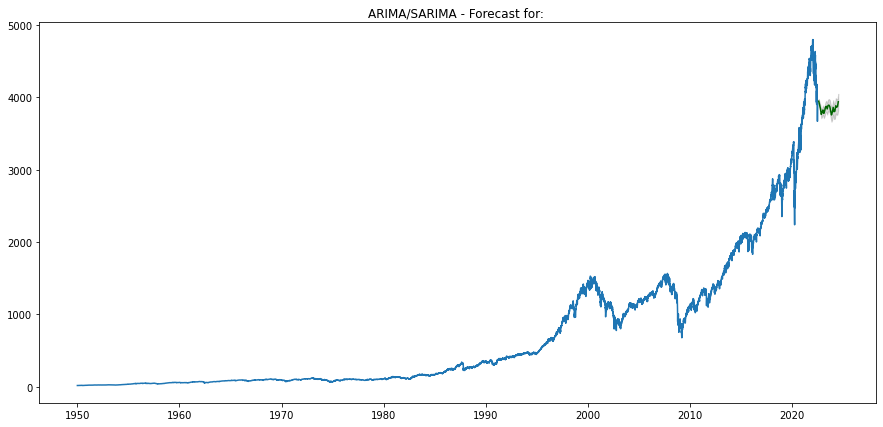

In [ ]:
forecast(SARIMA_model_sp,df['Close'])

#### Oil

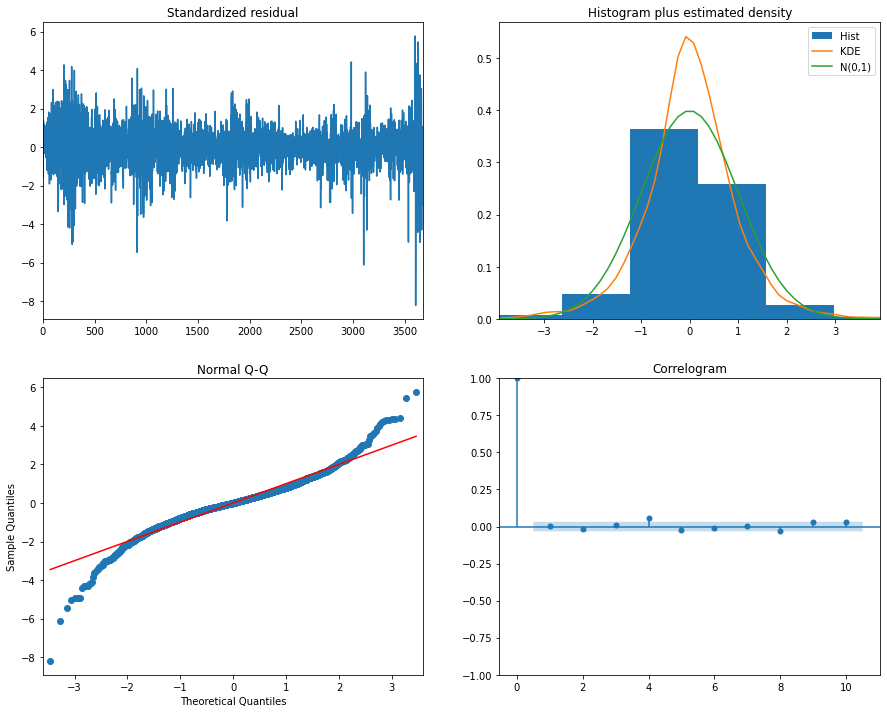

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model_oil = pm.auto_arima(df_oil["Close"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model_oil.plot_diagnostics(figsize=(15,12))
plt.show()


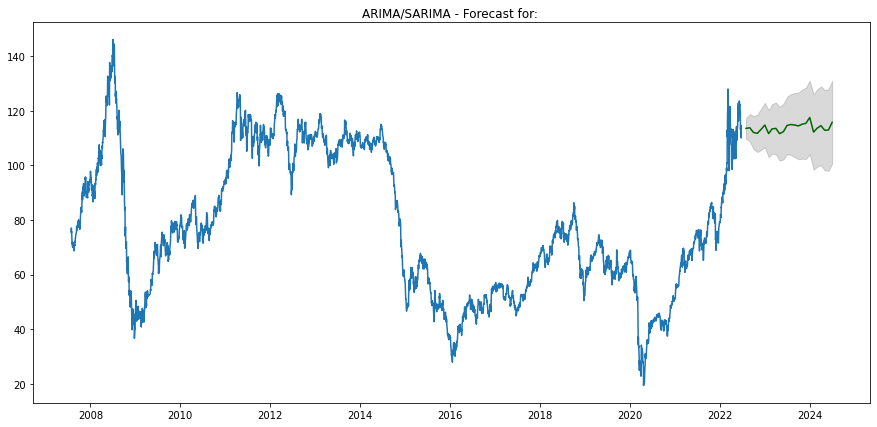

In [ ]:
forecast(SARIMA_model_oil,df_oil['Close'])

### Exogenous

In [25]:
def sarimax_forecast(SARIMAX_model, aDf, strMainCol, strExCol, periods=24):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({strExCol:pd.date_range(aDf.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(aDf.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[[strExCol]])
    index_of_fc = pd.date_range(aDf.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(aDf[strMainCol], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of ...")
    plt.show()


#### S&P 500

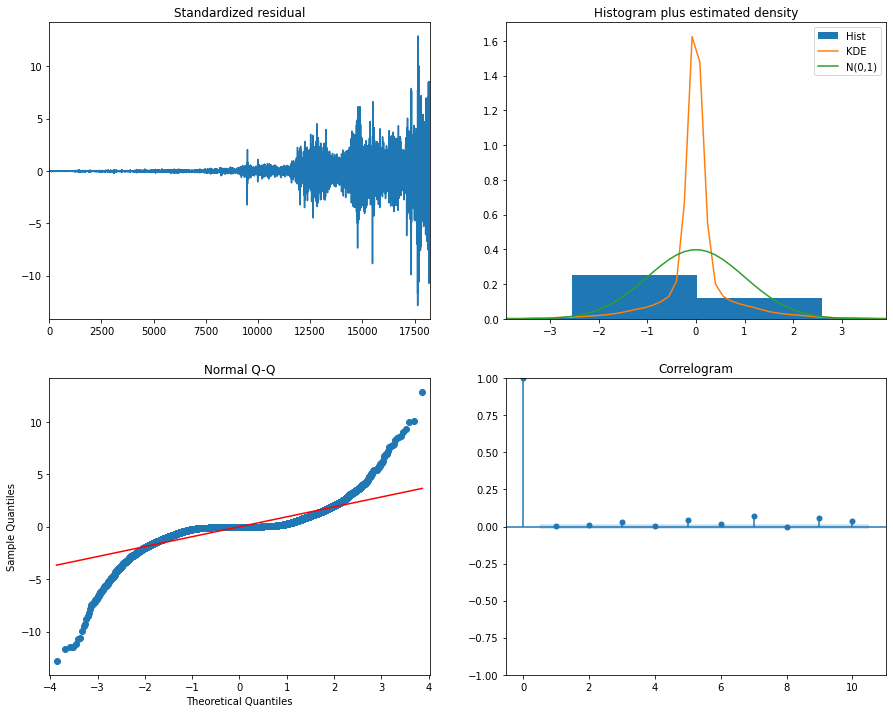

In [22]:
#adding exogenous variable

# SARIMAX Model
SARIMAX_model_X = pm.auto_arima(df['Close'], exogenous=df[['Volume']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model_X.plot_diagnostics(figsize=(15,12))
plt.show()

/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


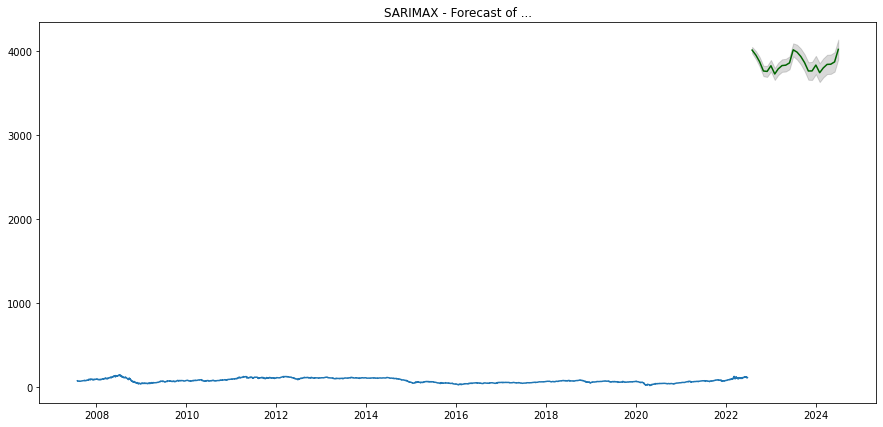

In [26]:
sarimax_forecast(SARIMAX_model_X, df_oil, 'Close','Volume',periods=24)

/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


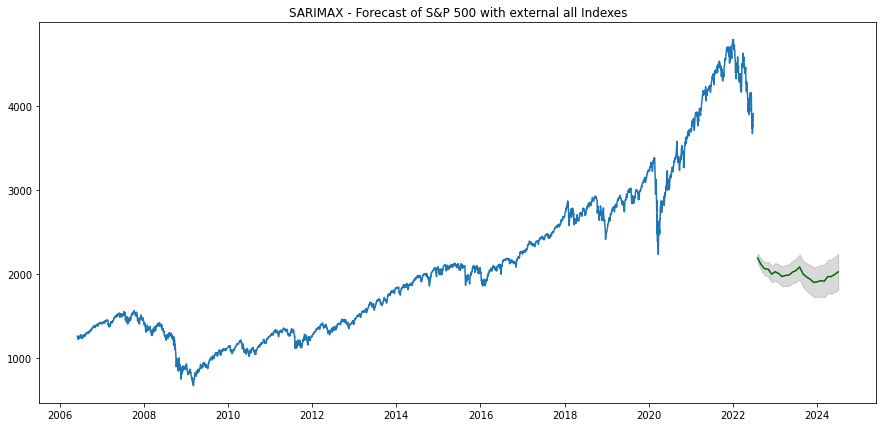

In [ ]:
lstIndex = ['jse_Close','ftse_Close','gdax_Close','hsng_Close','ks11_Close','nikk_Close']

n_periods = 24
forecast_df = pd.DataFrame({"jse_Close":pd.date_range(df.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS'))

#forecast_df

for aCol in lstIndex:
    forecast_df[aCol] = forecast_df.jse_Close

#forecast_df

fitted, confint = SARIMAX_model_0.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['jse_Close','ftse_Close','gdax_Close','hsng_Close','nikk_Close']])

index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.figure(figsize=(15,7))
plt.plot(df["sp500_Close"], color='#1f76b4')
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

plt.title("SARIMAX - Forecast of S&P 500 with external all Indexes")
plt.show()